In [17]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Config from notebook p300_dataset_exp_convnet.ipynb
snn_config = [
    [50, 1000, 0.01], # best performing parameters for simulator
    [50, 1000, None], # synaptic smoothing turned off
    [50, 1, 0.01], # spike scaling turned off
    [50, 1, None] # everything turned off, only RELU is swapped for spiking RELU
]

variants = []
for variant in snn_config:
        # name of the configuration
        name = f'snn [timesteps={variant[0]}, scaling={variant[1]}, synapse=None]' if variant[2] is None \
            else 'snn [timesteps={}, scaling={}, synapse={:3f}]'.format(variant[0], int(variant[1]), variant[2])
        variants.append(name)

In [19]:
default_output_path = 'p300_exp_output'

# Read excel file to the data frame
df = pd.read_excel(os.path.join(default_output_path, 'data_iterations.xlsx'))

In [20]:
# Filter top 10 accuracies of the ANN
top_10_accs_df = df.sort_values('ann_accuracy', ascending=False)[:10]

top_10_accs_df.head(5)

,Unnamed: 0,iterations,ann_accuracy,ann_precision,ann_recall,ann_f1,"snn [timesteps=50, scaling=1000, synapse=0.010000]_accuracy","snn [timesteps=50, scaling=1000, synapse=0.010000]_precision","snn [timesteps=50, scaling=1000, synapse=0.010000]_recall","snn [timesteps=50, scaling=1000, synapse=0.010000]_f1",...,"snn [timesteps=50, scaling=1000, synapse=None]_recall","snn [timesteps=50, scaling=1000, synapse=None]_f1","snn [timesteps=50, scaling=1, synapse=0.010000]_accuracy","snn [timesteps=50, scaling=1, synapse=0.010000]_precision","snn [timesteps=50, scaling=1, synapse=0.010000]_recall","snn [timesteps=50, scaling=1, synapse=0.010000]_f1","snn [timesteps=50, scaling=1, synapse=None]_accuracy","snn [timesteps=50, scaling=1, synapse=None]_precision","snn [timesteps=50, scaling=1, synapse=None]_recall","snn [timesteps=50, scaling=1, synapse=None]_f1"
12,12,13,0.643145,0.637681,0.664653,0.650888,0.644102,0.638359,0.665672,0.651729,...,0.667662,0.652089,0.539074,0.535554,0.592040,0.562382,0.533101,0.529672,0.595025,0.560450
17,17,18,0.641129,0.632173,0.676737,0.653696,0.640617,0.631383,0.676617,0.653218,...,0.673632,0.651902,0.513191,0.511297,0.607960,0.555455,0.523644,0.519481,0.636816,0.572195
1,1,2,0.641129,0.614694,0.758308,0.678990,0.643604,0.616626,0.760199,0.680927,...,0.758209,0.679447,0.529119,0.524161,0.636816,0.575022,0.521653,0.516616,0.680597,0.587377
5,5,6,0.638105,0.623098,0.700906,0.659716,0.639622,0.624446,0.701493,0.660731,...,0.703483,0.662605,0.516675,0.513240,0.655721,0.575797,0.539572,0.531496,0.671642,0.593407
6,6,7,0.638105,0.619048,0.720040,0.665736,0.639124,0.619454,0.722388,0.666973,...,0.721393,0.666360,0.519164,0.514629,0.682587,0.586826,0.525137,0.519016,0.692537,0.593350


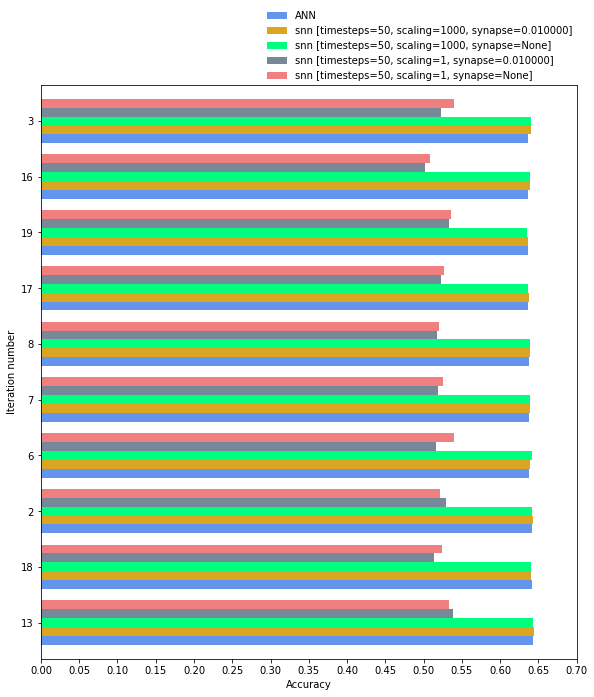

In [21]:
# Create chart for accuracies of the models

# Colors for each bar
colors = ['CornflowerBlue', 'GoldenRod', 'SpringGreen', 'LightSlateGray', 'LightCoral']

columns = ['ann_accuracy'] + [f'{name}_accuracy' for name in variants] # name of columns containing accuracy
ax = top_10_accs_df.plot.barh(x='iterations', y=columns,
                        width=0.8, color=colors,  figsize=[6.4 * 1.5, 8.8 * 1.2])


plt.xticks(np.arange(0, .75, 0.05))
plt.yticks(rotation=0)
plt.xlabel('Accuracy')
plt.ylabel('Iteration number')

# Set legend labels
legend_labels = ['ANN'] + variants
ax.legend(labels=legend_labels, loc='lower right', frameon=False, bbox_to_anchor=(1.0, 1.0),
          ncol=1, borderaxespad=0.)

In [22]:
# Paths for saving top 10 accuracies in .pdf and .svg
acc_top_10_path_svg = os.path.join(default_output_path, 'acc_top_10.svg')
acc_top_10_path_pdf = os.path.join(default_output_path, 'acc_top_10.pdf')


# Save output as svg and pdf file
fig = ax.get_figure()
fig.savefig(acc_top_10_path_svg, format='svg', bbox_inches='tight')
fig.savefig(acc_top_10_path_pdf, format='pdf', bbox_inches='tight')